# 2018 NBA Draft Analysis

<font color="#000066"> <font size="5"> Performance data:

FGM, FGA, FG%: field goals made, attempted and percentage

3PM, 3PA, 3P%: 3 points made, attempted and percentage

FTM, FTA, FT%: free throws made, attempted and percentage

TOV, PF: turnovers, personal fouls

ORB, DRB, ORB%, DRB%: offensive, defensive rebounds and percentage

RPG, APG, SPG, BPG, PPG: statistic per game, rebounds, assists, steals, blocks, points

TS: true shooting percentage

eFG%: effective field goal percentage

AST%, TOV%, STL%, BLK%, USG%: percentages of, assist, turnover, steal, block, usage(of team play)

ORtg, DRtg: offensive, defensive rating

eDiff: the difference between a team or player's ORtg and DRtg

PPS, PPR: points per Shot and pure point rating

etc...

<font color="#000066"> <font size="5"> Profile data:

Pos, Weight, Age, Agility, Shuttle Run, Sprint, Standing Vertical,

Max Vertical Leap, Max Bench Press, Body Fat Percentage,

Hand Length, Hand Width, Heightw/oshoesinches,

Heightw/shoesinches, Standing_Reach_inches, Wingspan_inches etc....

<font color="#000066"> <font size="5"> Target:

WS (Win Shares): an estimate of the total number of wins a player produces.

In [2]:
import pandas as pd
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate 

In [3]:
data=pd.read_csv('all_college_data.csv')
data.head()

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Standing Vertical,Max Vertical Leap,Max Bench Press,Body Fat Percentage,Hand Length,Hand Width,Heightw/oshoesinches,Heightw/shoesinches,Standing_Reach_inches,Wingspan_inches
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,30,36.5,10,0.0705,8.75,9.5,78.25,79.00,104.5,83.0
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,-,-,-,0.1475,9,10,81.75,83.75,110.0,83.5
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,32,35.5,6,0.07,9,10.25,77.75,79.50,104.5,84.0


In [4]:
data.shape

(417, 60)

In [5]:
data.describe()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,PER,WS,WS/48,Pick,Weight,Age,Heightw/oshoesinches,Heightw/shoesinches,Standing_Reach_inches,Wingspan_inches
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,...,409.000000,417.000000,416.000000,413.000000,413.000000,413.000000,348.000000,325.000000,348.000000,349.000000
mean,33.784173,31.935971,5.804892,11.845156,0.496564,1.150671,3.084748,0.315410,3.774724,5.101127,...,24.147677,3.917266,0.097661,25.886199,221.704600,21.113801,77.623563,78.946154,103.576868,82.503152
std,3.109607,3.577890,1.266687,2.861556,0.060827,0.962203,2.426055,0.161675,1.404653,1.716333,...,4.121691,3.737047,0.080322,16.078664,25.570669,1.295672,3.322566,3.339893,4.871994,4.067597
min,22.000000,19.100000,2.620000,4.290000,0.356000,0.000000,0.000000,0.000000,0.760000,1.420000,...,16.400000,-0.400000,-0.439000,1.000000,161.000000,18.000000,67.750000,69.000000,89.500000,70.000000
25%,32.000000,30.200000,4.900000,9.850000,0.451000,0.200000,0.600000,0.284000,2.800000,3.900000,...,21.100000,0.600000,0.059750,12.000000,201.000000,20.000000,75.250000,76.750000,100.000000,79.750000
50%,34.000000,32.300000,5.800000,11.800000,0.483000,1.100000,3.000000,0.350000,3.600000,4.900000,...,23.700000,3.100000,0.104000,25.000000,220.000000,21.000000,78.000000,79.250000,104.000000,82.750000
75%,36.000000,34.300000,6.600000,13.600000,0.534000,1.900000,5.000000,0.399000,4.700000,6.200000,...,26.900000,6.100000,0.146250,38.000000,240.000000,22.000000,80.250000,81.500000,107.000000,85.500000
max,41.000000,38.900000,9.800000,21.800000,0.660000,3.900000,9.900000,1.000000,8.700000,11.200000,...,42.300000,19.200000,0.318000,60.000000,289.000000,27.000000,85.250000,86.500000,114.500000,91.000000


In [6]:
# check missing data for each coloumn(feature)
data.isnull().sum()

Player                    0
Team_x                    0
GP                        0
MPG                       0
FGM                       0
FGA                       0
FG%                       0
3PM                       0
3PA                       0
3P%                       0
FTM                       0
FTA                       0
FT%                       0
TOV                       0
PF                        0
ORB                       0
DRB                       0
RPG                       0
APG                       0
SPG                       0
BPG                       0
PPG                       0
TS%                       8
eFG%                      8
Total S %                 8
ORB%                      8
DRB%                      8
TRB%                      8
AST%                      8
TOV%                      8
STL%                      8
BLK%                      8
USG%                      8
PPR                       8
PPS                       8
ORtg                

In [7]:
data[data.PER.isnull()]  #check the rows that have missing value on predictor "PER"

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Standing Vertical,Max Vertical Leap,Max Bench Press,Body Fat Percentage,Hand Length,Hand Width,Heightw/oshoesinches,Heightw/shoesinches,Standing_Reach_inches,Wingspan_inches
29,Malcolm Lee,UCLA,33,33.1,4.3,9.8,0.437,1.2,4.0,0.295,...,30,35.5,17,0.059,8.5,9.5,76.00,77.50,101.5,81.75
33,Amir Johnson,RU,28,35.8,4.4,11.8,0.373,1.5,4.4,0.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Taurean Green,UF,39,33.4,3.3,9.1,0.366,2.3,5.9,0.384,...,29,32.5,8,0.046,-,-,71.00,72.75,96.0,74.25
42,Jordan Farmar,UCLA,37,30.4,4.6,11.4,0.410,1.7,5.1,0.333,...,33.5,42,11,0.044,-,-,72.75,74.00,94.5,75.00
70,Archie Goodwin,UK,33,31.8,4.8,10.8,0.440,0.5,1.9,0.266,...,30,36,1,0.0455,8.5,9,75.75,77.25,102.0,81.50
119,Daniel Ewing,DUKE,33,34.5,5.5,12.8,0.427,2.1,6.0,0.347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Mike Taylor,ISU,26,32.2,5.0,13.6,0.365,2.3,6.7,0.345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,Austin Rivers,DUKE,34,33.2,5.1,11.8,0.433,1.7,4.7,0.365,...,32.5,37.5,1,0.062,8.5,10,75.50,77.00,96.5,79.25


In [8]:
data[data.PER.isnull()][['PER','PPR','PPS','ORtg','DRtg']]  #8 people have same missing value 

,PER,PPR,PPS,ORtg,DRtg
29,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN


In [9]:
data = data.dropna(thresh=len(data)*0.9, axis=1) ## drop the columns, which has <90% non-null values (threshold)
data = data.dropna(subset=['PER']) ## drop rows containing null values, accroding to this subset (of features) 

In [10]:
data.isnull().sum()

Player            0
Team_x            0
GP                0
MPG               0
FGM               0
FGA               0
FG%               0
3PM               0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
TOV               0
PF                0
ORB               0
DRB               0
RPG               0
APG               0
SPG               0
BPG               0
PPG               0
TS%               0
eFG%              0
Total S %         0
ORB%              0
DRB%              0
TRB%              0
AST%              0
TOV%              0
STL%              0
BLK%              0
USG%              0
PPR               0
PPS               0
ORtg              0
DRtg              0
eDiff             0
FIC               0
PER               0
WS                0
WS/48             1
Pick              2
Pos               2
Weight            2
Age               2
Pre-Draft Team    2
dtype: int64

In [11]:
data.shape

(409, 47)

In [31]:
data['Pos'].unique()

array(['SG', 'PF/C', 'F', 'PF', 'SF', 'SF/PF', 'PF/SF', 'FC', 'C', 'nan',
       'PG', 'SF/SG', 'SG/PG', 'C/PF', 'SG/SF', 'G', 'PG/SG', 'GF', 'G-F',
       'F-G'], dtype=object)

In [27]:
data.Pos = data.Pos.fillna('nan')
data.Weight = data.Weight.fillna(data.Weight.mean())
data.Age = data.Age.fillna(data.Age.mean())
data.Pick = data.Pick.fillna(61) ## for non selected player
data['WS/48'] = data['WS/48'].fillna(data['WS/48'].mean())
data['Pre-Draft Team'] = data['Pre-Draft Team'].fillna('others')

In [28]:
data.isnull().sum()

Player            0
Team_x            0
GP                0
MPG               0
FGM               0
FGA               0
FG%               0
3PM               0
3PA               0
3P%               0
FTM               0
FTA               0
FT%               0
TOV               0
PF                0
ORB               0
DRB               0
RPG               0
APG               0
SPG               0
BPG               0
PPG               0
TS%               0
eFG%              0
Total S %         0
ORB%              0
DRB%              0
TRB%              0
AST%              0
TOV%              0
STL%              0
BLK%              0
USG%              0
PPR               0
PPS               0
ORtg              0
DRtg              0
eDiff             0
FIC               0
PER               0
WS                0
WS/48             0
Pick              0
Pos               0
Weight            0
Age               0
Pre-Draft Team    0
dtype: int64

In [29]:
data.shape

(409, 47)

<font color="#000066"> <font size="4">Feature Creation

In [30]:
data.Pos.head()

0      SG
1    PF/C
2       F
3      PF
4      SF
Name: Pos, dtype: object

In [32]:
l = data.Pos.str.split("/").tolist()

In [33]:
flat_list = [item for sublist in l for item in sublist] ## convert list of list to a list 
np.unique(flat_list)

array(['C', 'F', 'F-G', 'FC', 'G', 'G-F', 'GF', 'PF', 'PG', 'SF', 'SG',
       'nan'], dtype='<U3')

In [34]:
data = data.reset_index(drop=True)

In [35]:
#One hot encoding
data['Pos-C']=0.0
data['Pos-PF']=0.0
data['Pos-SF']=0.0
data['Pos-PG']=0.0
data['Pos-SG']=0.0
for i in range(len(data)):
    p = data.Pos.str.split("/")[i]  ## p = ['PF', 'C']
    data.loc[i,'Pos-C'] = any(c in p for c in ('C','FC'))*1.0
    data.loc[i,'Pos-PF'] = any(c in p for c in ('GF','F-G','G-F','F','PF','FC'))*1.0
    data.loc[i,'Pos-SF'] = any(c in p for c in ('GF','F-G','G-F','F','SF','FC'))*1.0
    data.loc[i,'Pos-PG'] = any(c in p for c in ('GF','F-G','G-F','G','PG'))*1.0
    data.loc[i,'Pos-SG'] = any(c in p for c in ('GF','F-G','G-F','G','SG'))*1.0

In [36]:
data.head()

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Pick,Pos,Weight,Age,Pre-Draft Team,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,26.0,SG,210.0,21.0,Colorado,0.0,0.0,0.0,0.0,1.0
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,50.0,PF/C,260.0,22.0,Temple,1.0,1.0,0.0,0.0,0.0
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,52.0,F,227.0,24.0,Florida,0.0,1.0,1.0,0.0,0.0
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,48.0,PF,230.0,22.0,Duke,0.0,1.0,0.0,0.0,0.0
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,2.0,SF,232.0,18.0,Kentucky,0.0,0.0,1.0,0.0,0.0


<font color="#000066"> <font size="4">Data Visualization

Histogram

/Users/linjin/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/Users/linjin/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/Users/linjin/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/Users/linjin/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


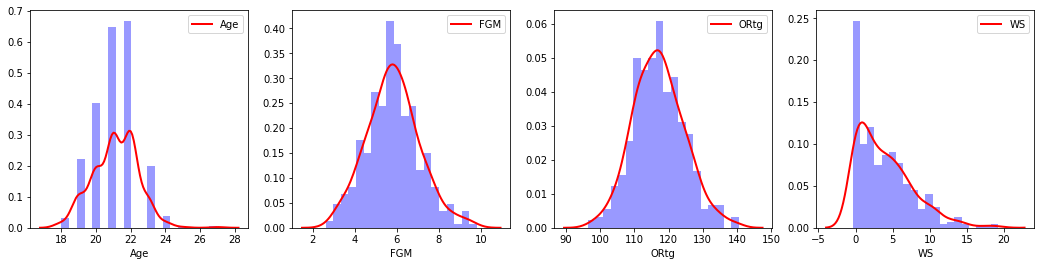

In [38]:
feature = ['Age', 'FGM', 'ORtg', 'WS']
index = 0
plt.figure(figsize=(18,4))
for fea in feature:
    index += 1
    plt.subplot(1,4, index)
    plt.xlabel(fea)
    sns.distplot(data[fea],kde=True,bins=20, color='b', kde_kws={"color": "r", "lw": 2, "label": fea})

Scatter Plot----predictors against response

<Figure size 432x288 with 0 Axes>

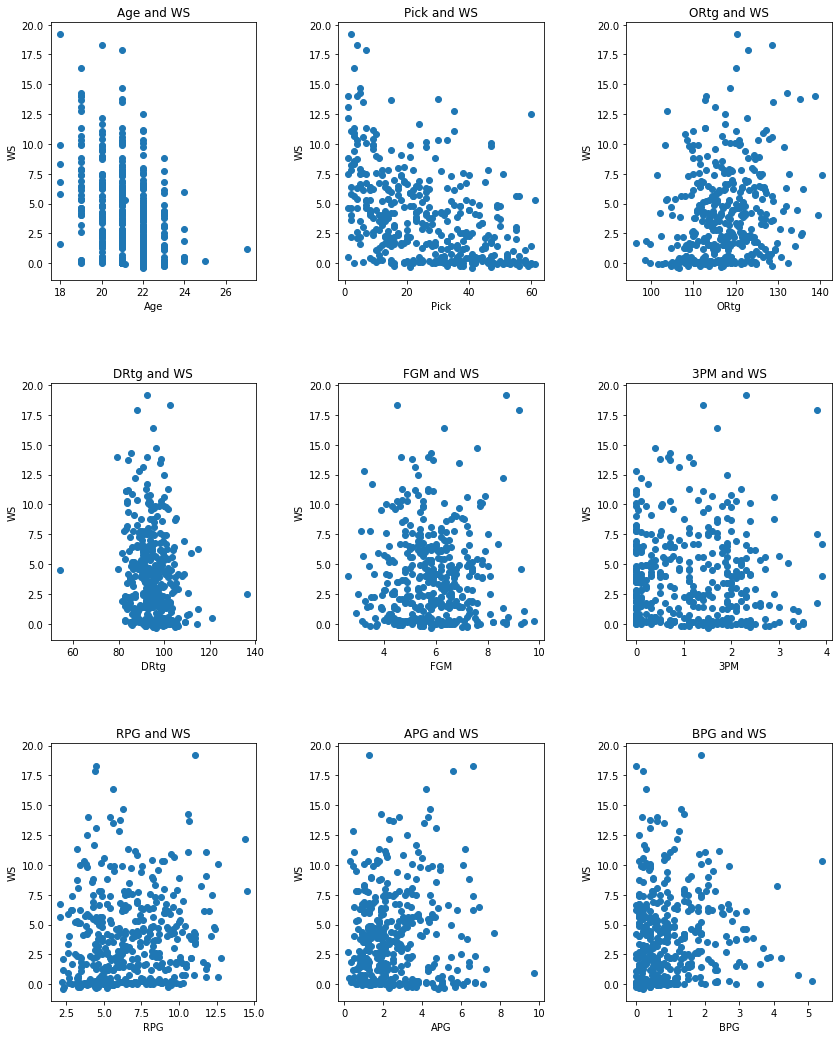

In [40]:
feature = ['Age','Pick','ORtg','DRtg','FGM','3PM','RPG','APG','BPG']
plt.figure()
fig, axes = plt.subplots(3,3, figsize =(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
for i in range(9):
    row, col = i//3, i%3
    axes[row][col].scatter(data[feature[i]], data['WS'])
    axes[row][col].set_title(feature[i]+' and WS')
    axes[row][col].set_xlabel(feature[i])
    axes[row][col].set_ylabel('WS')
plt.show()

heatmap---correlation among predictors

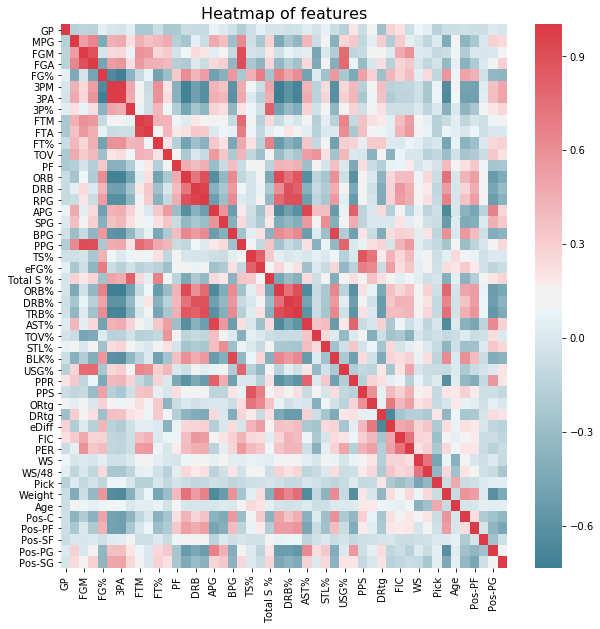

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Heatmap of features",fontsize=16)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), cmap=cmap)
plt.show()

Model Building

In [42]:
data.head()

,Player,Team_x,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,Pick,Pos,Weight,Age,Pre-Draft Team,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
0,Andre Roberson,CU,36,30.2,4.1,8.1,0.510,0.5,1.4,0.380,...,26.0,SG,210.0,21.0,Colorado,0.0,0.0,0.0,0.0,1.0
1,Lavoy Allen,TEM,33,33.9,4.7,9.7,0.480,0.2,0.5,0.294,...,50.0,PF/C,260.0,22.0,Temple,1.0,1.0,0.0,0.0,0.0
2,Vernon Macklin,UF,37,24.5,5.2,8.7,0.593,0.0,0.0,0.000,...,52.0,F,227.0,24.0,Florida,0.0,1.0,1.0,0.0,0.0
3,Ryan Kelly,DUKE,31,25.9,3.5,7.8,0.444,1.3,3.2,0.408,...,48.0,PF,230.0,22.0,Duke,0.0,1.0,0.0,0.0,0.0
4,Michael Kidd-Gilchrist,UK,40,31.1,4.0,8.2,0.491,0.3,1.3,0.255,...,2.0,SF,232.0,18.0,Kentucky,0.0,0.0,1.0,0.0,0.0


In [43]:
features = data.drop(['Player', 'Team_x', 'WS', 'WS/48', 'Pos', 'Pre-Draft Team', 'Pick', 
                     'FIC', 'PF', 'TOV', 'Total S %', 'eDiff'],1)
target = data['WS']

In [45]:
## here train-test split actually means train and validation split 
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3)

In [46]:
scaler = preprocessing.StandardScaler().fit(features_train)
scaler.transform(features_train)
scaler.transform(features_test)              #feature scaling, help gradient descent faster

array([[-0.52837411,  0.03408835, -0.22342162, ..., -0.61777222,
         1.77339435,  1.46385011],
       [ 1.03920884,  0.55174858,  0.97079562, ..., -0.61777222,
         1.77339435, -0.68313005],
       [-0.8418907 ,  1.15568551, -0.14380714, ..., -0.61777222,
        -0.56389037, -0.68313005],
       ...,
       [ 0.72569225, -1.31758002, -0.62149403, ..., -0.61777222,
        -0.56389037, -0.68313005],
       [ 1.66624202,  0.89685539,  0.65233769, ..., -0.61777222,
         1.77339435, -0.68313005],
       [-0.21485752, -3.67580995, -2.09436196, ..., -0.61777222,
        -0.56389037, -0.68313005]])

In [47]:
features_train.head()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,ORtg,DRtg,PER,Weight,Age,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
334,33,38.1,7.3,15.1,0.485,1.9,5.1,0.379,5.7,7.0,...,126.9,99.2,30.3,190.000000,22.000000,0.0,0.0,0.0,0.0,1.0
21,31,28.5,4.7,11.2,0.418,1.4,4.5,0.302,2.1,3.3,...,101.7,96.2,18.2,222.154791,21.132678,0.0,0.0,0.0,0.0,0.0
176,36,33.1,5.8,12.6,0.462,2.4,6.4,0.380,2.8,3.5,...,117.6,98.0,19.5,210.000000,21.000000,0.0,0.0,0.0,0.0,1.0
66,31,32.8,4.2,10.1,0.417,2.4,6.0,0.398,3.3,4.4,...,114.7,93.0,17.9,200.000000,20.000000,0.0,0.0,0.0,1.0,1.0
51,36,31.5,5.1,8.8,0.582,0.0,0.0,0.000,3.6,5.8,...,115.0,87.1,27.4,230.000000,22.000000,0.0,1.0,0.0,0.0,0.0


Linear Regression 

In [48]:
model_LR = LinearRegression()
model_LR.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
model_LR.coef_

array([ 3.83509616e-02,  6.12171728e-03, -2.24940148e+00, -7.15661914e-01,
       -1.49742411e+01, -1.03075840e+00, -2.05448007e-01, -1.62911608e-01,
       -1.08424913e+00, -4.27387965e-01, -2.23342920e+00, -4.94631879e+00,
       -4.15293963e+00,  4.77577049e+00, -1.23638536e+00,  1.81653469e+00,
       -1.61688565e+00,  1.91477979e+00, -3.55304175e+01,  4.14348545e+00,
       -4.00643560e-01, -6.42375056e-01,  9.52774004e-01,  1.27188621e-01,
        4.56476034e-01, -5.84885610e-01,  4.43385074e-01,  2.74521836e-02,
        4.18724068e-02, -3.57322629e+00,  3.56187807e-01, -7.73885161e-02,
        3.19939266e-02, -2.32158035e-04, -1.13841392e+00,  9.14388250e-01,
       -7.69085845e-01,  8.85364972e-02,  2.13485213e-01, -1.19455344e+00])

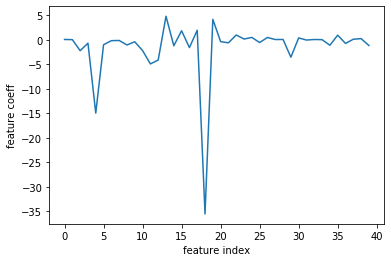

In [50]:
plt.plot(model_LR.coef_)
plt.xlabel('feature index')
plt.ylabel('feature coeff')
plt.show()

Ridge Regularization

In [51]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(features_train, target_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [52]:
model_ridge.coef_

array([ 5.78566803e-02, -1.07101846e-02, -4.64030465e-01,  8.51569460e-02,
       -6.03861498e-01,  5.46612256e-01, -1.88907064e-01, -8.91361998e-02,
        1.90384995e-01, -9.16905781e-02, -2.18872533e-01, -8.23134031e-01,
       -4.04452990e-01,  1.01304286e+00, -1.05325482e+00,  1.65588964e+00,
       -1.44760309e+00,  1.94235927e-01, -9.46356791e-01, -9.22306962e-01,
       -2.90852391e-01, -5.49609473e-01,  7.71620593e-01,  9.68269229e-02,
        3.19312050e-01, -4.23251651e-01,  3.99459897e-01,  5.92304018e-02,
        2.48510979e-01, -3.22806511e+00,  1.93657062e-01, -7.16472525e-02,
        1.07681228e-02,  1.99146188e-03, -1.16726168e+00,  6.75406924e-01,
       -7.52764044e-01,  9.68085203e-02,  2.12337232e-01, -1.07598078e+00])

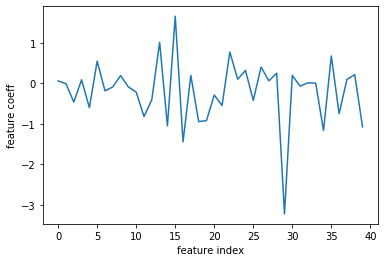

In [53]:
plt.plot(model_ridge.coef_)
plt.xlabel('feature index')
plt.ylabel('feature coeff')
plt.show()

Lasso Regularization

In [54]:
model_lasso = linear_model.Lasso()
model_lasso.fit(features_train, target_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
model_lasso.coef_

array([ 0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.05823014,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.0779752 , -0.06734218,  0.02602743,  0.00966708, -0.42891475,
        0.        , -0.        ,  0.        ,  0.        , -0.        ])

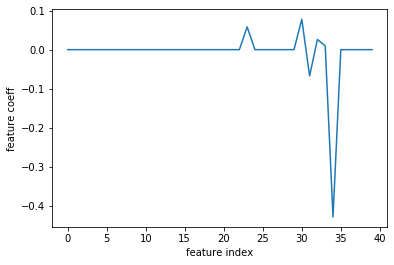

In [56]:
plt.plot(model_lasso.coef_)
plt.xlabel('feature index')
plt.ylabel('feature coeff')
plt.show()

In [57]:
imp_features = features_train.columns.get_values()

In [58]:
imp_features

array(['GP', 'MPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'PPG',
       'TS%', 'eFG%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%',
       'BLK%', 'USG%', 'PPR', 'PPS', 'ORtg', 'DRtg', 'PER', 'Weight',
       'Age', 'Pos-C', 'Pos-PF', 'Pos-SF', 'Pos-PG', 'Pos-SG'],
      dtype=object)

In [59]:
imp_features[~(model_lasso.coef_==0)]

array(['AST%', 'ORtg', 'DRtg', 'PER', 'Weight', 'Age'], dtype=object)

cross-validation

In [60]:
scores_LR1 = cross_validate(model_LR, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
scores_LR2 = cross_validate(model_LR, features_test, target_test, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Cross-Validation score for Linear Regression: ", np.mean(-1*scores_LR1['test_score']), np.sqrt(np.mean(-1*scores_LR2['test_score'])))

scores_ridge1 = cross_validate(model_ridge, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
scores_ridge2 = cross_validate(model_ridge, features_test, target_test, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Cross-Validation score for Ridge Regression: ", np.mean(-1*scores_ridge1['test_score']), np.sqrt(np.mean(-1*scores_ridge2['test_score'])))

scores_lasso1 = cross_validate(model_lasso, features_test, target_test, cv=10, scoring='neg_mean_absolute_error', return_train_score=True)
scores_lasso2 = cross_validate(model_lasso, features_test, target_test, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
print("Cross-Validation score for Lasso Regression: ", np.mean(-1*scores_lasso1['test_score']), np.sqrt(np.mean(-1*scores_lasso2['test_score'])))

Cross-Validation score for Linear Regression:  3.4614024796654945 4.323491058480668
Cross-Validation score for Ridge Regression:  3.0508211913762335 3.846019972691393
Cross-Validation score for Lasso Regression:  2.6889064534332805 3.4631425297047826


Predictions

In [62]:
prospects_df = pd.read_csv('2018_prospects.csv')

In [63]:
prospects_df.head()

,Player,Pos,Pre-Draft Team,GP,MPG,FGM,FGA,FG%,3PM,3PA,...,PPR,PPS,ORtg,DRtg,PER,Pick,Weight,Age,Heightw/shoesinches,Wingspan_inches
0,Deandre Ayton,C,Arizona,35,33.5,7.9,12.9,0.612,0.3,1.0,...,-2.7,1.6,130.3,97.5,30.6,1,250,19.6,85,89.0
1,Marvin Bagley III,PF/C,Duke,33,33.9,8.2,13.3,0.614,0.7,1.8,...,-3.7,1.6,128.1,97.5,28.3,2,225,18.9,83,84.5
2,Luka Doncic,PG,Real Madrid,49,24.7,4.7,10.4,0.456,1.5,4.9,...,4.2,1.5,124.2,106.2,25.4,3,220,19.0,80,NaN
3,Jaren Jackson Jr.,PF/C,Michigan State,35,21.8,3.4,6.6,0.513,1.1,2.7,...,-4.8,1.6,120.7,85.8,25.1,4,225,18.4,83,88.0
4,Mohamed Bamba,C,Texas,30,30.2,4.9,9.0,0.541,0.5,1.7,...,-4.2,1.4,118.4,88.4,26.4,5,216,19.8,85,93.0


In [64]:
prospects_df['Wingspan_inches'] = prospects_df['Wingspan_inches'].fillna(prospects_df['Wingspan_inches'].mean())
prospects_df['PER'] = prospects_df['PER'].fillna(prospects_df['PER'].mean())

In [65]:
prospects_df.reset_index(drop=True)
prospects_df['Pos-C']=0.0
prospects_df['Pos-PF']=0.0
prospects_df['Pos-SF']=0.0
prospects_df['Pos-PG']=0.0
prospects_df['Pos-SG']=0.0
for i in range(len(prospects_df)):
    p = prospects_df.Pos.str.split("/")[i]
    prospects_df.loc[i,'Pos-C'] = any(c in p for c in ('C','FC'))*1.0
    prospects_df.loc[i,'Pos-PF'] = any(c in p for c in ('GF','F-G','G-F','F','PF'))*1.0
    prospects_df.loc[i,'Pos-SF'] = any(c in p for c in ('GF','F-G','G-F','F','SF'))*1.0
    prospects_df.loc[i,'Pos-PG'] = any(c in p for c in ('GF','F-G','G-F','G','PG'))*1.0
    prospects_df.loc[i,'Pos-SG'] = any(c in p for c in ('GF','F-G','G-F','G','SG'))*1.0

In [66]:
pro_features = prospects_df.drop(['Player', 'Pre-Draft Team', 'Pos', 'Pick', 
                                  'Heightw/shoesinches', 'Wingspan_inches'], 1)

In [67]:
pro_features.head()

,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,ORtg,DRtg,PER,Weight,Age,Pos-C,Pos-PF,Pos-SF,Pos-PG,Pos-SG
0,35,33.5,7.9,12.9,0.612,0.3,1.0,0.343,4.0,5.5,...,130.3,97.5,30.6,250,19.6,1.0,0.0,0.0,0.0,0.0
1,33,33.9,8.2,13.3,0.614,0.7,1.8,0.397,4.0,6.3,...,128.1,97.5,28.3,225,18.9,1.0,1.0,0.0,0.0,0.0
2,49,24.7,4.7,10.4,0.456,1.5,4.9,0.304,4.1,5.1,...,124.2,106.2,25.4,220,19.0,0.0,0.0,0.0,1.0,0.0
3,35,21.8,3.4,6.6,0.513,1.1,2.7,0.396,3.0,3.8,...,120.7,85.8,25.1,225,18.4,1.0,1.0,0.0,0.0,0.0
4,30,30.2,4.9,9.0,0.541,0.5,1.7,0.275,2.7,4.0,...,118.4,88.4,26.4,216,19.8,1.0,0.0,0.0,0.0,0.0


In [68]:
scaler.transform(pro_features)

array([[ 0.41217566,  0.40795407,  1.68732596, ..., -0.61777222,
        -0.56389037, -0.68313005],
       [-0.21485752,  0.52298967,  1.92616941, ..., -0.61777222,
        -0.56389037, -0.68313005],
       [ 4.80140792, -2.12282927, -0.86033748, ..., -0.61777222,
         1.77339435, -0.68313005],
       ...,
       [ 0.72569225, -1.28882112, -0.54187955, ..., -0.61777222,
        -0.56389037, -0.68313005],
       [ 1.35272543,  0.29291846, -0.780723  , ..., -0.61777222,
        -0.56389037,  1.46385011],
       [-0.8418907 , -1.97903476, -1.97494024, ..., -0.61777222,
         1.77339435, -0.68313005]])

In [69]:
results = model_lasso.predict(pro_features)
prospects_df['WS'] = results
final = prospects_df[['Player', 'Pick', 'WS']]

In [70]:
final

,Player,Pick,WS
0,Deandre Ayton,1,5.400670
1,Marvin Bagley III,2,5.128833
2,Luka Doncic,3,5.423086
3,Jaren Jackson Jr.,4,5.517474
4,Mohamed Bamba,5,4.177481
5,Michael Porter Jr.,6,2.441860
6,Mikal Bridges,7,4.315324
7,Wendell Carter Jr.,8,5.777658
8,Collin Sexton,9,3.959598
9,Miles Bridges,10,4.457247


In [71]:
final.sort_values(['WS'],ascending=[False]).iloc[0:60,]

,Player,Pick,WS
7,Wendell Carter Jr.,8,5.777658
3,Jaren Jackson Jr.,4,5.517474
2,Luka Doncic,3,5.423086
0,Deandre Ayton,1,5.400670
84,Gary Clark,61,5.282989
1,Marvin Bagley III,2,5.128833
17,Zhaire Smith,18,5.099178
58,Jontay Porter,59,5.073269
12,Trae Young,13,4.997570
49,Landry Shamet,50,4.536666


In [78]:
ground = pd.read_csv('2018_NBA_Draft.csv',encoding = "ISO-8859-1")   # True results

In [79]:
ground.head()

,Pick,Player,Pos,Natl
0,1,Deandre Ayton,C,ÊBahamas
1,2,Marvin Bagley III,PF,ÊUnited States
2,3,Luka Doncic,SG,ÊSlovenia
3,4,Jaren Jackson Jr.,PF,ÊUnited States
4,5,Trae Young,PG,ÊUnited States


In [80]:
ground = ground[['Player','Pick']]
perf = pd.merge(ground, final, how='left', on='Player')

In [81]:
final_perf = perf.sort_values(['WS'], ascending=[False])

In [82]:
final_perf

,Player,Pick_x,Pick_y,WS
6,Wendell Carter Jr.,7,8.0,5.777658
3,Jaren Jackson Jr.,4,4.0,5.517474
2,Luka Doncic,3,3.0,5.423086
0,Deandre Ayton,1,1.0,5.400670
1,Marvin Bagley III,2,2.0,5.128833
15,Zhaire Smith,16,18.0,5.099178
4,Trae Young,5,13.0,4.997570
25,Landry Shamet,26,50.0,4.536666
32,Jalen Brunson,33,33.0,4.527153
31,Jevon Carter,32,41.0,4.521637


# Congratulations to Deandre Ayton